# CSC2034 Project: Biocomputing

## Basic custom CNN architecture

Firstly, the required libraries are imported and constants are defined.

In [ ]:
from __future__ import print_function
import tensorflow.keras as keras
import tensorflow.keras.datasets as datasets
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
num_classes = 10
epochs = 50
input_shape = (32, 32, 3)
experiment = {}
# input image dimensions
img_rows, img_cols = 32, 32

The data is then split between the test and train data. x_train are uint8 arrays of RGB image data with shape (num_samples, 3, 32, 32). y_train are uint8 arrays of category labels (integers in range 0-9) each with shape (num_samples, 1).

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

By dividing the training and test data by 255 (maximum possible color value for each channel) are normalized to values between 0 and 1. This helps data efficiency because they are not large integers.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Class vectors are converted to binary class matrices

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_orig = y_test
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(10))
model.summary()

model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                288010    
Total params: 288,906
Trainable params: 288,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 8.0633 - accuracy: 0.1162 - val_loss: 8.1199 - val_accuracy: 0.1084
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 7.9627 - accuracy: 0.1085 - val_loss: 8.1768 - val_accuracy: 0.1050
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.0387 - accuracy: 0.1098 - val_loss: 8.2037 - val_accuracy: 0.1058
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.1109 - accuracy: 0.1094 - val_loss: 8.1164 - val_accuracy: 0.1051
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.1144 - accuracy: 0.1072 - val_loss: 7.9813 - val_accuracy: 0.1056
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.1737 - accuracy: 0.1069 - val_loss: 8.1142 - val_accuracy: 0.1064
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.0927 - accuracy: 0.1059 - val_loss: 8.3934 - val_accuracy:

## Helper functions

### Helper function for plotting single graph


In [ ]:
def plot(history):
  fig, ax=plt.subplots()
  max_val = max(history.history['val_accuracy'])
  ax.plot(history.history['accuracy'], label='accuracy', color="black")
  ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  ax.axhline(y=max_val, color="gray", linestyle="dotted")
  ax.text(0 , max_val, "{:.2f}".format(max_val), color="gray", 
          ha="left", va="bottom")
  plt.legend(loc='lower left')

  ax2 = ax.twinx()
  ax2.plot(history.history['loss'], label='loss', color="#f0cac7")
  ax2.plot(history.history['val_loss'], label='val_loss', color="#d5c7f0")
  ax2.set_ylabel('Loss')
  plt.legend(loc='lower right')
  plt.show()


### Helper function for plotting final graph 

Loops through experiment list and graphs a scatter plot of only max val_accuracies.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


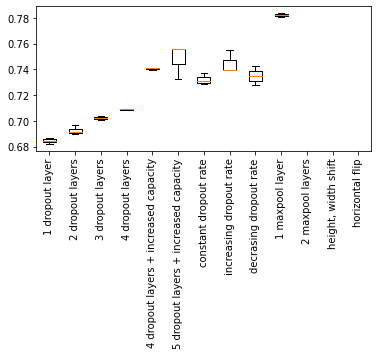

In [ ]:
def plot_final(experiment):
  keys = list(experiment.keys())
  index = []
  data = []

  for i in range(len(keys)):
    index.append(i + 1)

  for key in experiment:
      data.append(list(map(lambda x: max(x.history['val_accuracy']), experiment[key])))

  fig, ax = plt.subplots()
  ax.boxplot(data)
  plt.xticks(rotation=90)
  plt.xticks(index,keys)
  ax.set_aspect(50)
  plt.show()

plot_final(experiment)

### Helper function to compile and display accuracy loss graph


Model is trained three seperate times and the histories are appended to the experiment dictionary

In [ ]:
def compile_then_plot(func, name='', iteration=3):
  experiment[name] = [] 

  for i in range(iteration):
    print(i + 1 , "/ 3")
    model = func()

    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  
    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          verbose=0)

    experiment[name].append(history)
    history = []


  plot(experiment[name][2])

## Removing the discrepancy by comparison with official Keras example

### Disabling the conversion from dense to sparse data

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_12 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                288010    
Total params: 288,906
Trainable params: 288,906
Non-trainable params: 0
_________________________________________________________________


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_13 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                288010    
Total params: 288,906
Trainable params: 288,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2888 - accuracy: 0.1287 - val_loss: 2.2288 - val_accuracy: 0.1882
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2123 - accuracy: 0.2047 - val_loss: 2.1630 - val_accuracy: 0.2495
Epoch 3/50
1563/

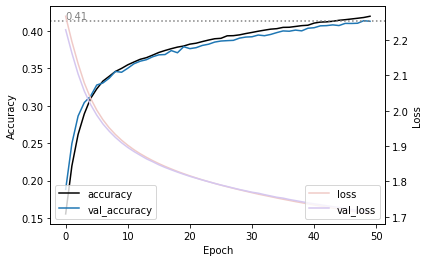

In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(10))
model.summary()

model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

plot(history)

### Using Adam instead of Adadelta as the optimizer

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_14 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                288010    
Total params: 288,906
Trainable params: 288,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6377 - accuracy: 0.4237 - val_loss: 1.2963 - val_accuracy: 0.5450
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2181 - accuracy: 0.5771 - val_loss: 1.2602 - val_accuracy: 0.5587
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0847 - accu

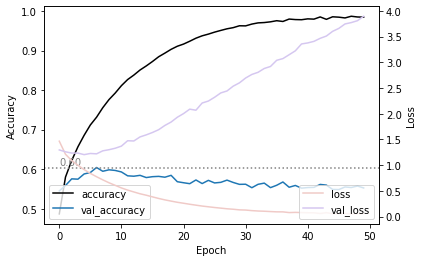

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(10))
model.summary()

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

plot(history)

## Regularization strategies to reduce generalization gap

### Dropout

#### One dropout layer

1 / 3
2 / 3
3 / 3


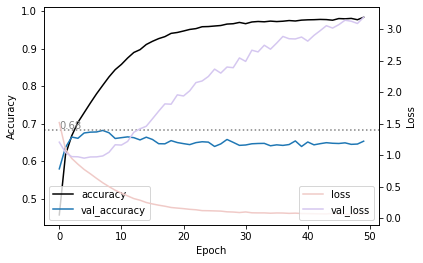

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Dropout(0.25)),
  model.add(Conv2D(64, (3, 3), activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  #model.add(Dropout(0.5))
  #model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='1 dropout layer')

#### Two dropout layers

1 / 3
2 / 3
3 / 3


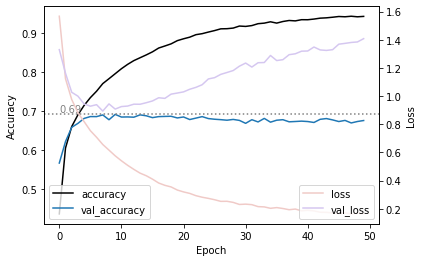

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Dropout(0.4)),
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.4))
  #model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  #model.add(Dropout(0.5))
  #model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='2 dropout layers')

#### Three dropout layers

1 / 3
2 / 3
3 / 3


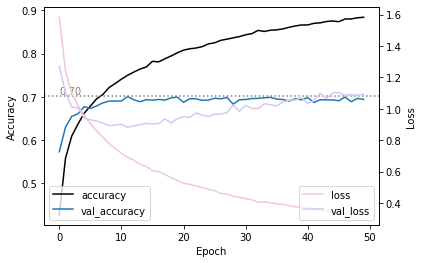

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  #model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='3 dropout layers')

#### Four dropout layers

1 / 3
2 / 3
3 / 3


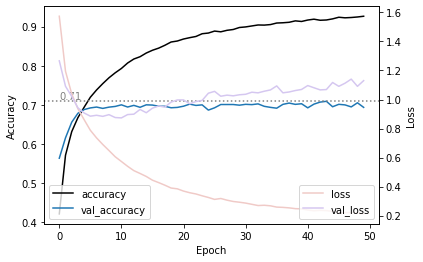

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='4 dropout layers')

#### Four dropout layers with increased capacity

1 / 3
2 / 3
3 / 3


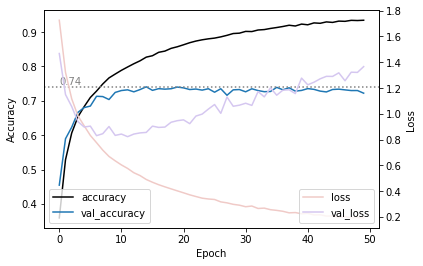

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='4 dropout layers + increased capacity')

#### Five dropout layers with increased capacity

1 / 3
2 / 3
3 / 3


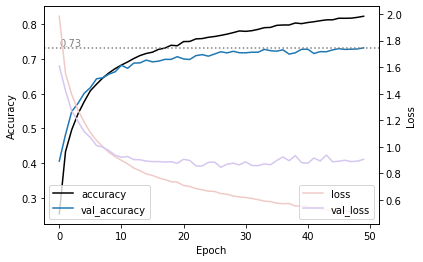

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='5 dropout layers + increased capacity')

#### Constant dropout rate across the stack

1 / 3
2 / 3
3 / 3


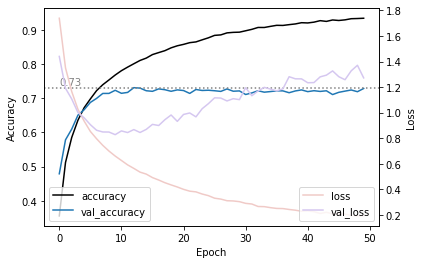

In [ ]:
def create_model(): 
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='constant dropout rate')

#### Larger dropout rate further down the stack

1 / 3
2 / 3
3 / 3


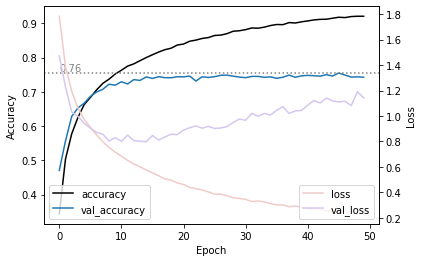

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='increasing dropout rate')

#### Smaller dropout rate further down the stack

1 / 3
2 / 3
3 / 3


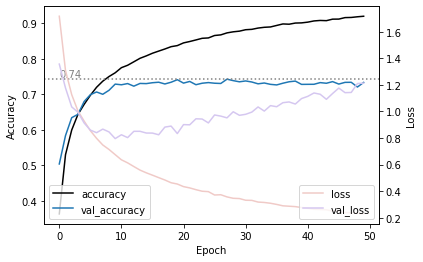

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='decrasing dropout rate')

Plot final graph

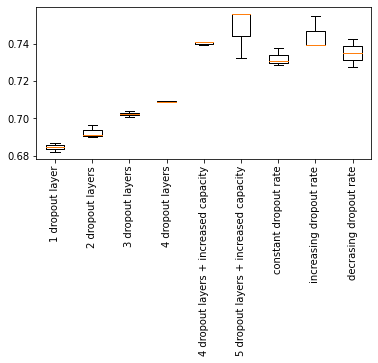

In [ ]:
plot_final(experiment)

### Max-pooling

#### One maxpooling layer

1 / 3
2 / 3
3 / 3


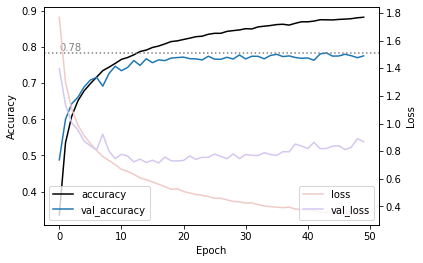

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, '1 maxpool layer')

#### Two maxpooling layer

1 / 3
2 / 3
3 / 3


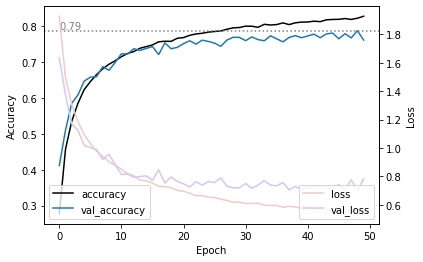

In [ ]:
def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  return model

compile_then_plot(create_model, name='2 maxpool layers')

#### Three maxpooling layer

In [ ]:
'''
model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

compile_then_plot()
'''

"\nmodel = models.Sequential()\nmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(num_classes, activation='softmax'))\n\ncompile_then_plot()\n"

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


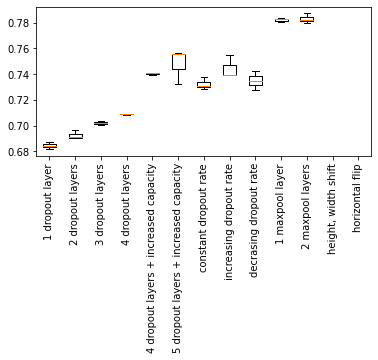

In [ ]:
plot_final(experiment)

### Data augmetation

#### Helper function and preliminary code

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_orig = y_test
y_test = keras.utils.to_categorical(y_test, num_classes)

def compile_then_plot(func, name='', iteration=3):
  experiment[name] = [] 

  for i in range(iteration):
    print(i + 1 , "/ 3")
    model = func()

    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    datagen.fit(x_train)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
              steps_per_epoch=len(x_train) / batch_size, 
              validation_data = (x_test, y_test),
              epochs=epochs, 
              verbose=1)

    experiment[name].append(history)
    history = []

  plot(experiment[name][2])

def create_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  return model

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Height and width shift

1 / 3
Epoch 1/50
781/781 [==============================] - 24s 30ms/step - loss: 2.0911 - accuracy: 0.1984 - val_loss: 1.7188 - val_accuracy: 0.3720
Epoch 2/50
781/781 [==============================] - 23s 30ms/step - loss: 1.6725 - accuracy: 0.3783 - val_loss: 1.3815 - val_accuracy: 0.4843
Epoch 3/50
781/781 [==============================] - 24s 30ms/step - loss: 1.4975 - accuracy: 0.4582 - val_loss: 1.3080 - val_accuracy: 0.5343
Epoch 4/50
781/781 [==============================] - 24s 30ms/step - loss: 1.3883 - accuracy: 0.4998 - val_loss: 1.1462 - val_accuracy: 0.5916
Epoch 5/50
781/781 [==============================] - 23s 30ms/step - loss: 1.2856 - accuracy: 0.5417 - val_loss: 1.1203 - val_accuracy: 0.5967
Epoch 6/50
781/781 [==============================] - 24s 30ms/step - loss: 1.2396 - accuracy: 0.5637 - val_loss: 1.0856 - val_accuracy: 0.6163
Epoch 7/50
781/781 [==============================] - 24s 30ms/step - loss: 1.1695 - accuracy: 0.5885 - val_loss: 0.9580 - val_acc

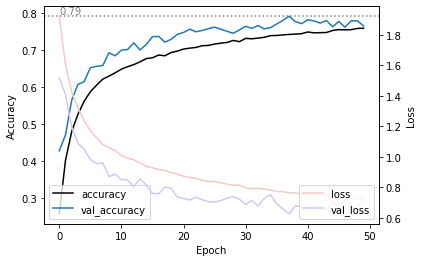

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2
)

compile_then_plot(create_model, name='height, width shift')


#### Horizontal flip

1 / 3
Epoch 1/50
781/781 [==============================] - 7s 7ms/step - loss: 2.0092 - accuracy: 0.2315 - val_loss: 1.4023 - val_accuracy: 0.4882
Epoch 2/50
781/781 [==============================] - 6s 7ms/step - loss: 1.4204 - accuracy: 0.4844 - val_loss: 1.1696 - val_accuracy: 0.5763
Epoch 3/50
781/781 [==============================] - 5s 7ms/step - loss: 1.2158 - accuracy: 0.5694 - val_loss: 1.0793 - val_accuracy: 0.6158
Epoch 4/50
781/781 [==============================] - 5s 7ms/step - loss: 1.0898 - accuracy: 0.6123 - val_loss: 0.9603 - val_accuracy: 0.6583
Epoch 5/50
781/781 [==============================] - 6s 7ms/step - loss: 0.9942 - accuracy: 0.6540 - val_loss: 0.9064 - val_accuracy: 0.6779
Epoch 6/50
781/781 [==============================] - 6s 7ms/step - loss: 0.9418 - accuracy: 0.6727 - val_loss: 0.8571 - val_accuracy: 0.7006
Epoch 7/50
781/781 [==============================] - 6s 7ms/step - loss: 0.8918 - accuracy: 0.6907 - val_loss: 0.8176 - val_accuracy: 0.7125


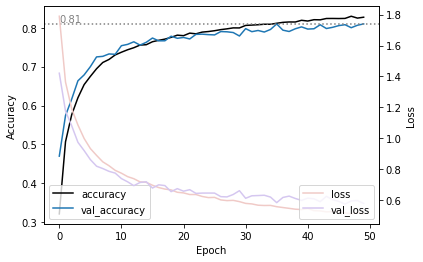

In [ ]:
datagen = ImageDataGenerator(
    horizontal_flip = True
)

compile_then_plot(create_model, name='horizontal flip')


#### Combined

1 / 3
Epoch 1/50
781/781 [==============================] - 25s 31ms/step - loss: 2.1317 - accuracy: 0.1773 - val_loss: 1.5369 - val_accuracy: 0.4192
Epoch 2/50
781/781 [==============================] - 24s 31ms/step - loss: 1.6361 - accuracy: 0.3885 - val_loss: 1.3534 - val_accuracy: 0.5032
Epoch 3/50
781/781 [==============================] - 24s 31ms/step - loss: 1.4578 - accuracy: 0.4700 - val_loss: 1.2382 - val_accuracy: 0.5549
Epoch 4/50
781/781 [==============================] - 24s 31ms/step - loss: 1.3416 - accuracy: 0.5239 - val_loss: 1.1351 - val_accuracy: 0.5973
Epoch 5/50
781/781 [==============================] - 24s 31ms/step - loss: 1.2507 - accuracy: 0.5538 - val_loss: 1.0657 - val_accuracy: 0.6102
Epoch 6/50
781/781 [==============================] - 24s 31ms/step - loss: 1.1985 - accuracy: 0.5742 - val_loss: 1.0234 - val_accuracy: 0.6352
Epoch 7/50
781/781 [==============================] - 25s 31ms/step - loss: 1.1614 - accuracy: 0.5935 - val_loss: 0.9345 - val_acc

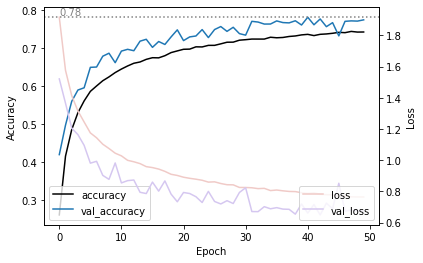

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True
)

compile_then_plot(create_model, name='height, width shift + horizontal flip')

#### Combined + ZCA Whitening

1 / 3
Epoch 1/50
781/781 [==============================] - 25s 31ms/step - loss: 2.0789 - accuracy: 0.1975 - val_loss: 1.5534 - val_accuracy: 0.4260
Epoch 2/50
781/781 [==============================] - 24s 31ms/step - loss: 1.6444 - accuracy: 0.3881 - val_loss: 1.3203 - val_accuracy: 0.5109
Epoch 3/50
781/781 [==============================] - 24s 30ms/step - loss: 1.4605 - accuracy: 0.4650 - val_loss: 1.2395 - val_accuracy: 0.5451
Epoch 4/50
781/781 [==============================] - 24s 31ms/step - loss: 1.3433 - accuracy: 0.5192 - val_loss: 1.1234 - val_accuracy: 0.5935
Epoch 5/50
781/781 [==============================] - 24s 31ms/step - loss: 1.2672 - accuracy: 0.5543 - val_loss: 1.1776 - val_accuracy: 0.5756
Epoch 6/50
781/781 [==============================] - 24s 31ms/step - loss: 1.1941 - accuracy: 0.5790 - val_loss: 0.9601 - val_accuracy: 0.6588
Epoch 7/50
781/781 [==============================] - 24s 31ms/step - loss: 1.1517 - accuracy: 0.5947 - val_loss: 0.9427 - val_acc

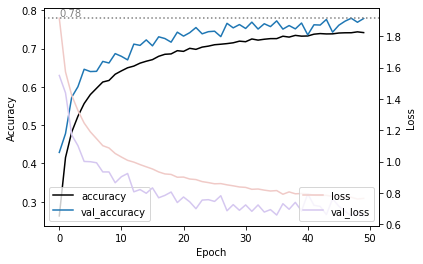

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,

    horizontal_flip = True,

    zca_whitening=True
)

compile_then_plot(create_model, name='combined + zca whitening')

## Final results

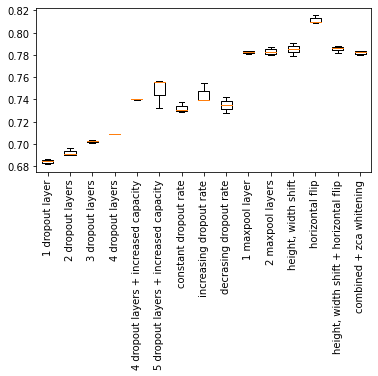

In [ ]:
plot_final(experiment)